In [206]:
import warnings
warnings.filterwarnings('ignore')

In [207]:
## importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [208]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [209]:
df.shape

(45211, 17)

In [210]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [211]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [212]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [213]:
df.isnull().sum() #no null values to be found

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [214]:
df[['Target','housing','default','loan']] = df[['Target','housing','default','loan']].replace(('yes','no'),(1,0))
df['education'] = df['education'].replace(('tertiary', 'secondary', 'primary', 'unknown'),(3,2,1,0))
df['month'] = df['month'].replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12))
#Dealing with binary variables and some categorical variables. I decided to make education a categorical variable from 0-3 to see if there is any correlation between increased 
#education and the target variable. I did the same with months as there is a depency between them, i.e. theres a beginning and end of the year.
#I did not one hot encode all the data because that would mess up my graphs. It will be done afterwards.

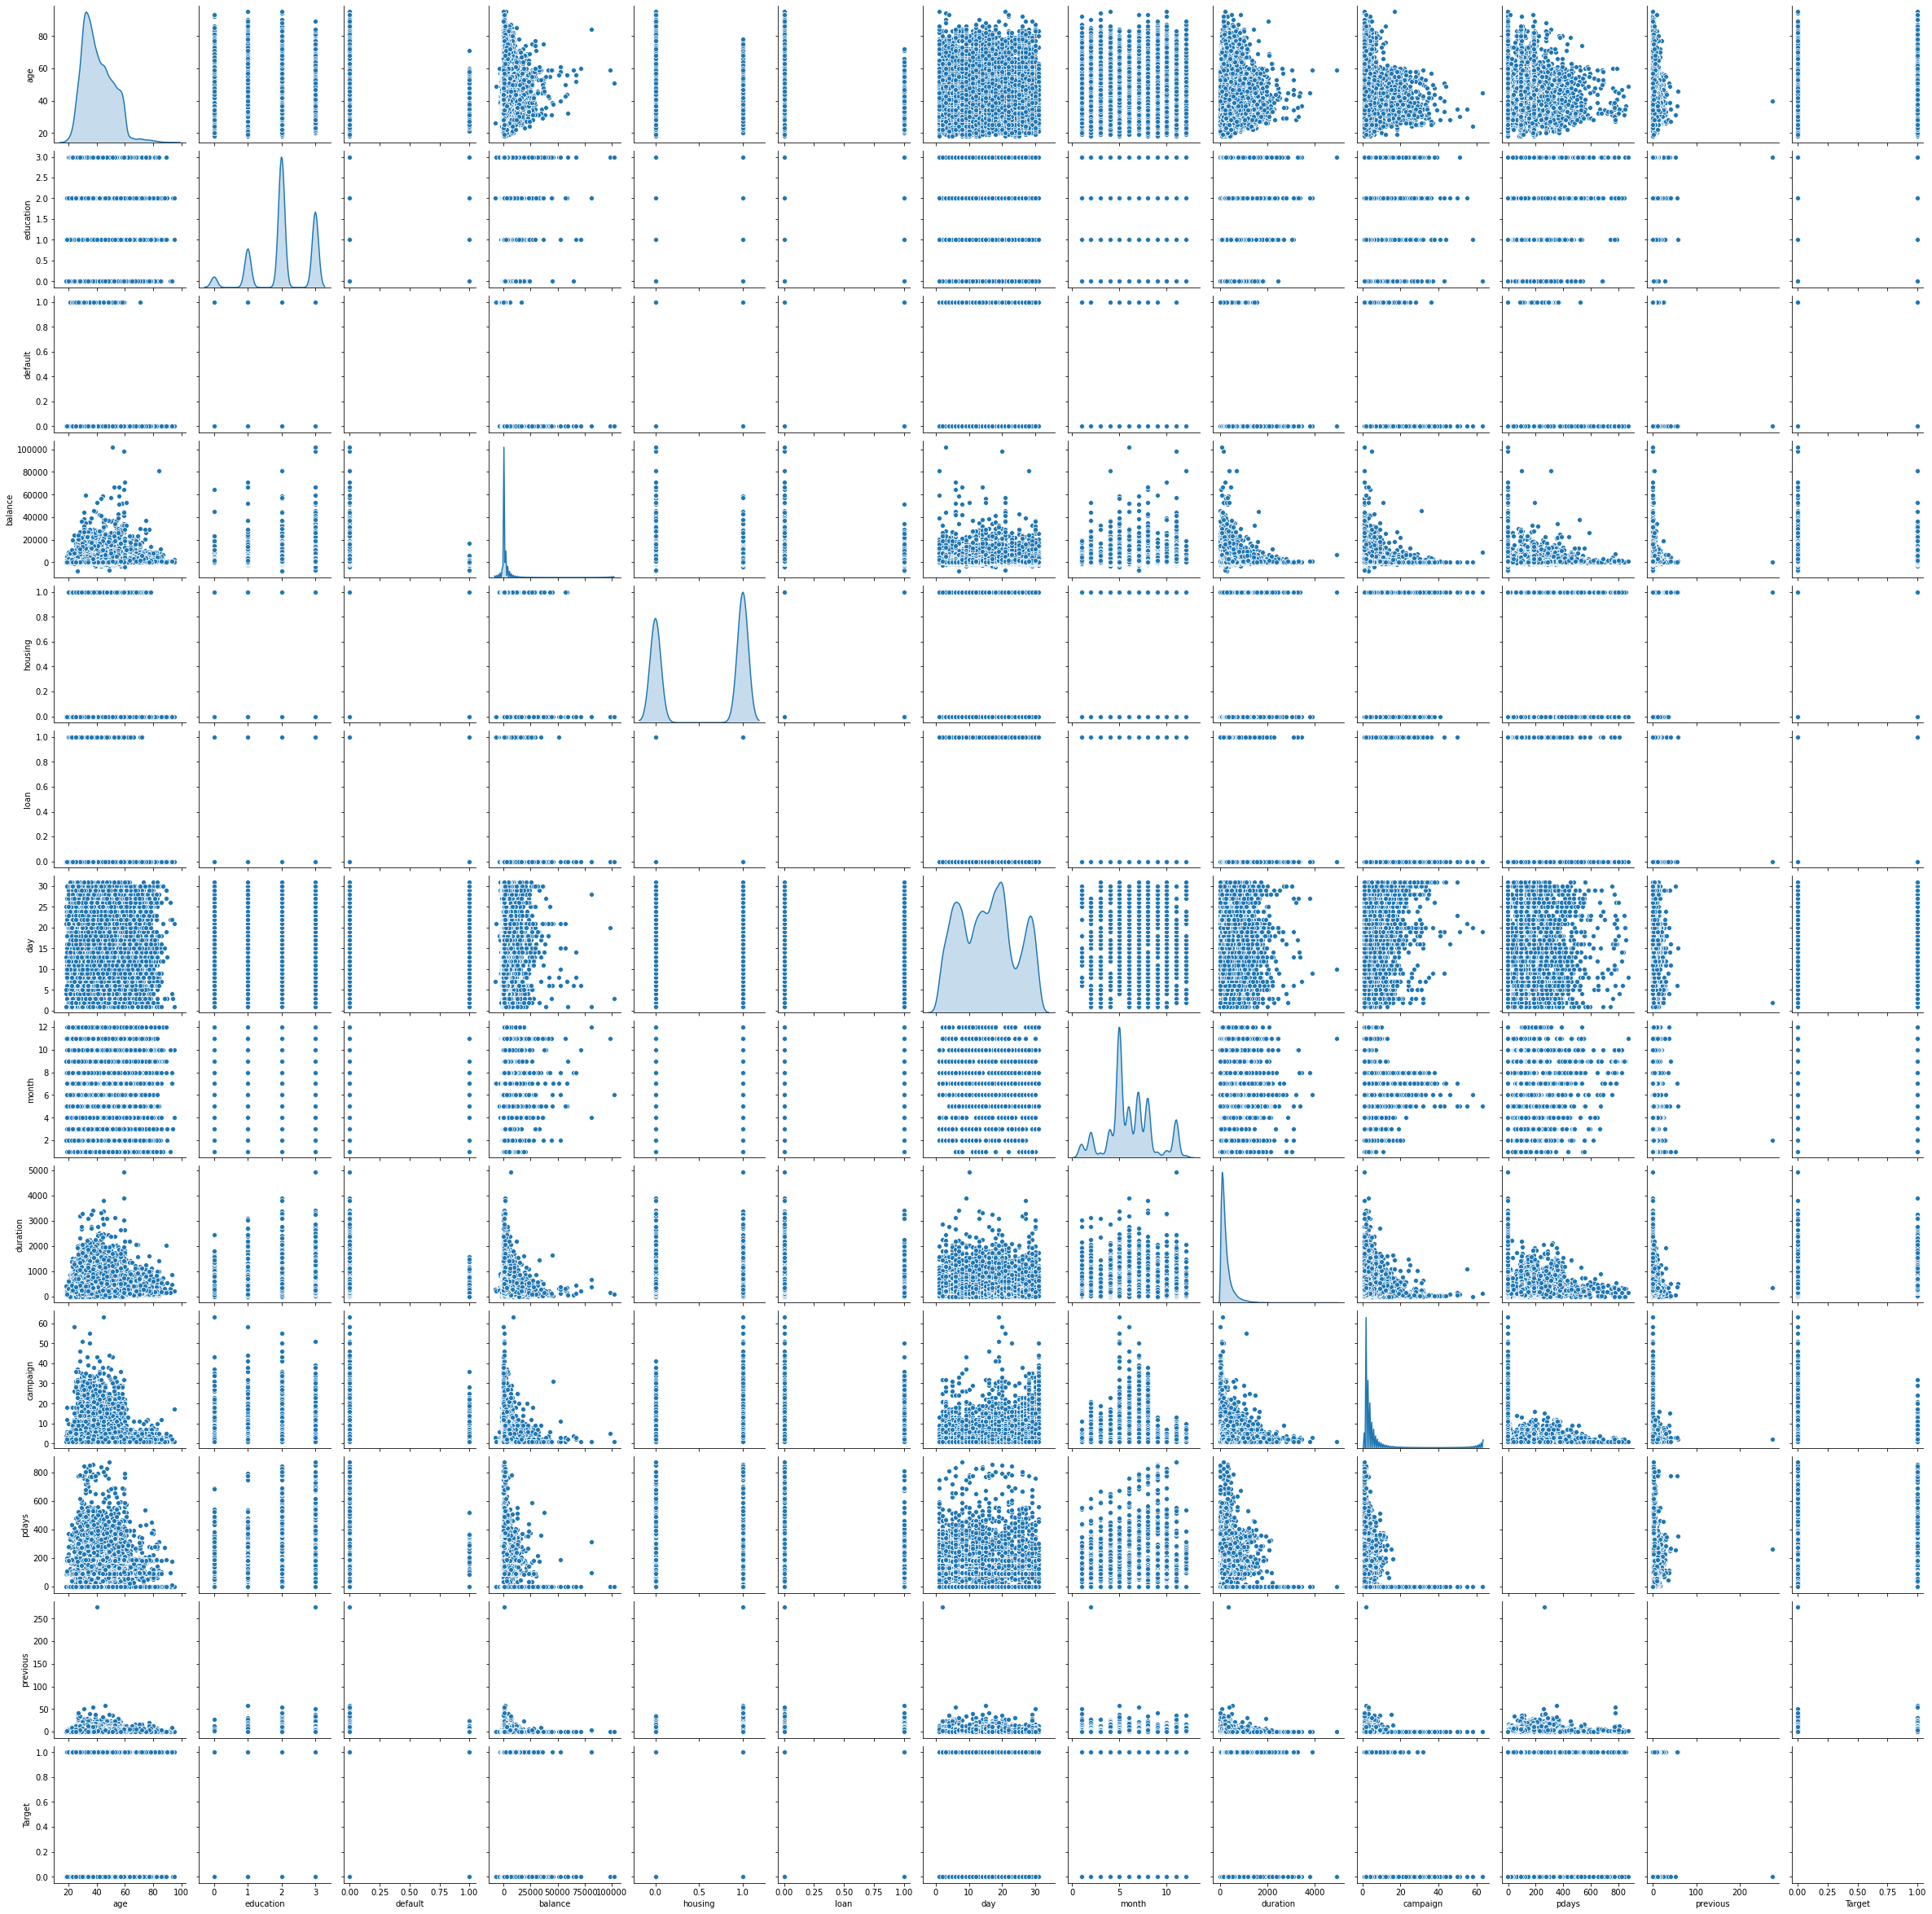

In [199]:
sns.pairplot(df,diag_kind='kde')

In [215]:
#right skew for a lot of data such as campaign, duration, balance
#right skew for a lot of interactions aswell such as balance x pdays, balance x campaign, balance x duration

In [216]:
vc = df[['Target','housing','default','loan']].sum().reset_index().rename(columns={'index':'Col_Name',0:"Value_Count_1"})
vc['Value_Count_0'] = df.shape[0] - vc['Value_Count_1']
vc

,Col_Name,Value_Count_1,Value_Count_0
0,Target,5289,39922
1,housing,25130,20081
2,default,815,44396
3,loan,7244,37967


In [217]:
#most of the people were a success
#most had loans
#most had default
#houses almost evenly split between yes, no

In [218]:
dfnew = df.drop(['marital','job','contact','poutcome'],axis=1)
dfnew = dfnew.join(pd.get_dummies(df[['marital','job','contact','poutcome']],prefix=['marital','job','contract','poutcome'],))

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,contract_cellular,contract_telephone,contract_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,1,0,0,0,0,1,0,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,0,0,0,0,1,0,0,0,1
3,47,0,0,1506,1,0,5,5,92,1,...,0,0,0,0,0,1,0,0,0,1
4,33,0,0,1,0,0,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,825,0,0,17,11,977,3,...,1,0,0,1,0,0,0,0,0,1
45207,71,1,0,1729,0,0,17,11,456,2,...,0,0,0,1,0,0,0,0,0,1
45208,72,2,0,5715,0,0,17,11,1127,5,...,0,0,0,1,0,0,0,0,1,0
45209,57,2,0,668,0,0,17,11,508,4,...,0,0,0,0,1,0,0,0,0,1


In [219]:
df=dfnew

In [220]:
x = df.loc[:, df.columns != 'Target']

In [221]:
y = df.loc[:, df.columns == 'Target']  

In [222]:
x.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,contract_cellular,contract_telephone,contract_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,1,0,0,0,0,1,0,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,0,0,0,0,1,0,0,0,1
3,47,0,0,1506,1,0,5,5,92,1,...,0,0,0,0,0,1,0,0,0,1
4,33,0,0,1,0,0,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1


In [223]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [224]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)



In [225]:
xtrain.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,contract_cellular,contract_telephone,contract_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
35272,39,3,0,4239,1,0,7,5,40,1,...,0,0,0,1,0,0,0,0,0,1
10705,44,3,0,647,0,0,16,6,226,2,...,0,0,0,0,0,1,0,0,0,1
43536,46,1,0,429,1,0,26,4,465,2,...,0,0,0,1,0,0,0,0,1,0
6960,55,1,0,81,1,0,28,5,172,1,...,0,0,0,0,0,1,0,0,0,1
41892,28,2,0,172,1,0,19,10,123,2,...,0,0,0,1,0,0,0,0,0,1


In [226]:
xtest.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,contract_cellular,contract_telephone,contract_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
33177,36,2,0,349,1,0,20,4,365,1,...,0,0,0,1,0,0,0,0,0,1
1544,33,2,0,177,0,0,8,5,75,4,...,0,1,0,0,0,1,0,0,0,1
44480,79,2,0,631,0,0,9,8,440,5,...,0,0,0,0,1,0,1,0,0,0
17886,26,2,1,-42,0,1,30,7,305,3,...,0,0,0,1,0,0,0,0,0,1
12505,30,2,1,0,0,1,2,7,95,3,...,0,0,0,0,0,1,0,0,0,1


In [227]:
from sklearn.linear_model import LogisticRegression  

model = LogisticRegression(random_state=7) 

model.fit(xtrain, ytrain)

LogisticRegression(random_state=7)

In [229]:
y_predict = model.predict(xtest)   

print("Trainig accuracy",model.score(xtrain,ytrain)) 
print()
print("Testing accuracy",model.score(xtest, ytest))  

Trainig accuracy 0.8868139160109964

Testing accuracy 0.8927307578885284


In [230]:
#accuracy is high and almost equal in both which is good

In [231]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

In [232]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

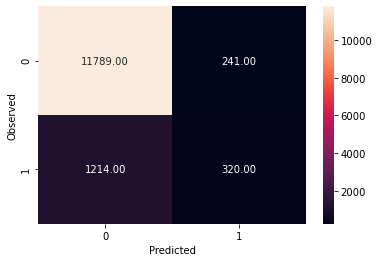

In [233]:
draw_cm(ytest,y_predict)

In [234]:
#has a lot of false negatives which is a bad sign

In [235]:
recall_score(ytest,y_predict)

0.20860495436766624

In [238]:
#the recall score is too low as seen above and in the matrix

In [237]:
precision_score(ytest,y_predict)

0.5704099821746881

In [239]:
#precision score is also low

In [240]:
f1_score(ytest,y_predict)

0.3054892601431981

In [241]:
#f1 score is low aswell

In [242]:
roc_auc_score(ytest,y_predict)

0.5942858520799262

In [243]:
#roc is also low
#overall the basic model is not good

In [244]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [245]:
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l2', solver=i)  # changing values of solver
    model.fit(xtrain, ytrain) 
    y_predict = model.predict(xtest)     
    train_score.append(round(model.score(xtrain,ytrain),3))
    test_score.append(round(model.score(xtest, ytest),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.899, 0.887, 0.899, 0.881, 0.881]

[0.903, 0.893, 0.903, 0.887, 0.887]


In [246]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']  # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l1', solver=i)  # changed value of penaly to 'l1'
    model.fit(xtrain, ytrain) 
    y_predict = model.predict(xtest)     
    train_score.append(round(model.score(xtrain,ytrain),3))
    test_score.append(round(model.score(xtest, ytest),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.899, 0.881]

[0.903, 0.887]


In [247]:
model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(xtrain, ytrain) 

y_predict = model.predict(xtest)     

print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))   

Trainig accuracy 0.8295889025816033

Testing accuracy 0.8336773813034503


Trainig accuracy 0.8989161689891617

Testing accuracy 0.903347095252138

Confusion Matrix


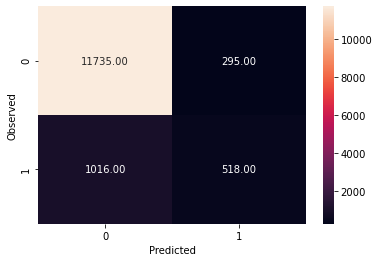

None

Recall: 0.3376792698826597

Precision: 0.6371463714637147

F1 Score: 0.4414145717937793

Roc Auc Score: 0.6565786208099915


In [248]:
#Therefore final model is
model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear') 
model.fit(xtrain, ytrain)
y_predict = model.predict(xtest)
print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))
print()
print('Confusion Matrix')
print(draw_cm(ytest,y_predict))
print()
print("Recall:",recall_score(ytest,y_predict))
print()
print("Precision:",precision_score(ytest,y_predict))
print()
print("F1 Score:",f1_score(ytest,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(ytest,y_predict))

In [249]:
#the model has better scores for all but is still not a great model

In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC



model_entropy = DecisionTreeClassifier(criterion='entropy')

In [256]:
model_entropy.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

In [257]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

DecisionTreeClassifier(criterion='entropy', presort=False)

In [259]:
print("Train: %.2f" % model_entropy.score(xtrain, ytrain))  # performance on train data
print("Test: %.2f" % model_entropy.score(xtest, ytest))  # performance on test data

Train: 1.00
Test: 0.88


In [264]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [265]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

DecisionTreeClassifier(criterion='entropy', max_depth=4, presort=False)

In [267]:
print("Train: %.2f" % clf_pruned.score(xtrain, ytrain))  # performance on train data
print("Test: %.2f" % clf_pruned.score(xtest, ytest))  # performance on test data

Train: 0.90
Test: 0.90


In [268]:
#overfitting was not that big of an issue

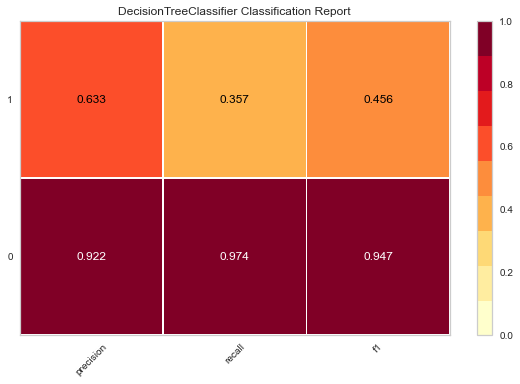

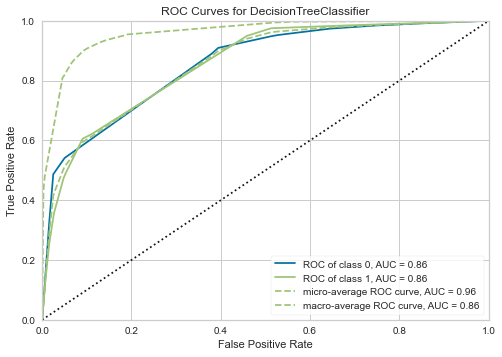

In [271]:
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(xtrain, ytrain)
roc.score(xtest, ytest)
roc.show()

In [273]:
## Calculating feature importance
features = [col for col in df.columns if col != 'Target']
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.572667
poutcome_success,0.294571
contract_unknown,0.109386
month,0.017903
housing,0.003819
marital_married,0.001654
age,0.000000
job_unemployed,0.000000
job_self-employed,0.000000
job_services,0.000000


In [282]:

#it seems to be using only a couple features

In [276]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(xtrain, ytrain)

In [278]:
pred_RF = rfcl.predict(xtest)
acc_RF = accuracy_score(ytest, pred_RF)

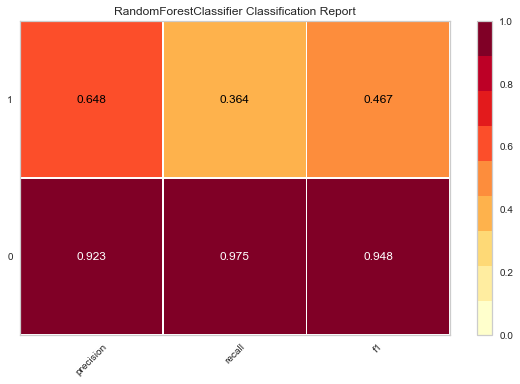

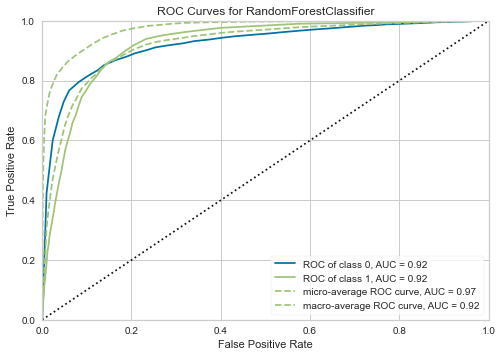

In [285]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(xtrain, ytrain)
roc.score(xtest, ytest)
roc.show()

In [286]:
#the random forest seems to do better than the other models

In [288]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(xtrain, ytrain)

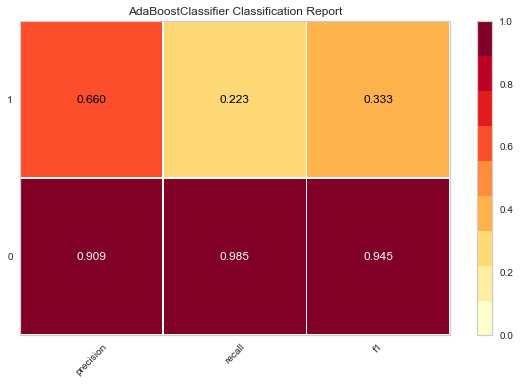

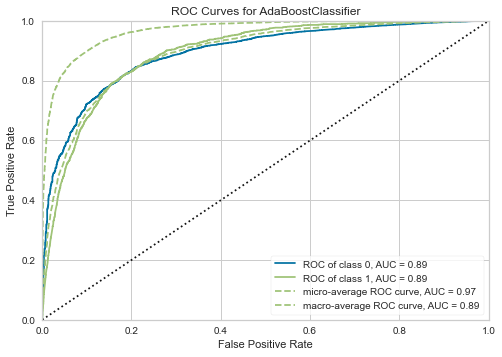

In [289]:
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(xtrain, ytrain)
roc.score(xtest, ytest)
roc.show()

In [290]:
#the adaboost model seem sto do worse

In [293]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(xtrain, ytrain)

In [295]:
pred_BG = bgcl.predict(xtest)
acc_BG = accuracy_score(ytest, pred_BG)

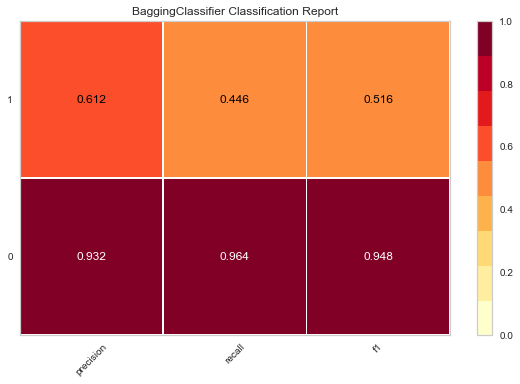

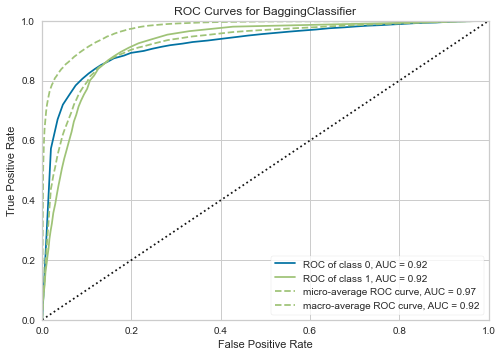

In [297]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(xtrain, ytrain)
roc.score(xtest, ytest)
roc.show()

In [298]:
#The bagging model does well aswell

In [ ]:
#The best algorithm is the bagging forest as determined by comparing ROC scores.